In [47]:
import os
import numpy as np
from scipy.io import loadmat
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
Image.MAX_IMAGE_PIXELS = 999999999

In [39]:
MATLAB_cell_centroids_src = r'\\kukissd\Kyu_Sync\Aging\data\svs\10x\CellDetectionandStainAnalysis_Kyu_200827'
MATLAB_cell_centroids_names = [_ for _ in os.listdir(MATLAB_cell_centroids_src) if _.endswith('mat')]
MATLAB_cell_centroids_paths = [os.path.join(MATLAB_cell_centroids_src,_) for _ in MATLAB_cell_centroids_names]

In [40]:
DL_results_src = r'\\kukissd\Kyu_Sync\Aging\data\svs\5x\classification_for_DL_skin_v4'
# DL_results_names = [_ for _ in os.listdir(DL_results_src) if _.endswith('tif')]
DL_results_names = [_.replace('_CellDetectionRes.mat','.tif') for _ in MATLAB_cell_centroids_names]
DL_results_paths = [os.path.join(DL_results_src,_) for _ in DL_results_names]
Collagen_Class = 10

In [41]:
cell_centroid = loadmat(MATLAB_cell_centroids_paths[0])['pkN']
cell_centroid

array([[  811,  8957],
       [  881,  9121],
       [ 1037,  9019],
       ...,
       [30334, 12633],
       [30343, 12645],
       [30347, 12643]], dtype=uint16)

In [52]:
cell_centroid_5x=np.around(np.divide(cell_centroid,2)).astype('int')
cell_centroid_5x

array([[  406,  4478],
       [  440,  4560],
       [  518,  4510],
       ...,
       [15167,  6316],
       [15172,  6322],
       [15174,  6322]])

In [61]:
x= pd.DataFrame(cell_centroid_5x)[0]
y= pd.DataFrame(cell_centroid_5x)[1]

In [ ]:
DL_result = Image.open(DL_results_paths[0])
DL_result = np.array(DL_result)

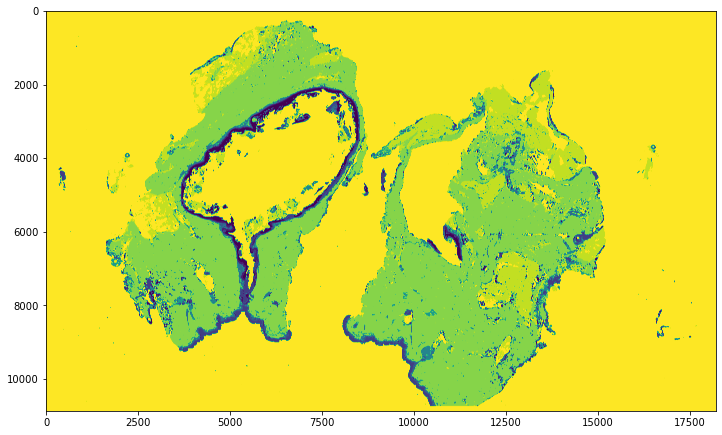

In [49]:
fig,ax=plt.subplots(figsize=(12,12))
ax.imshow(DL_result)

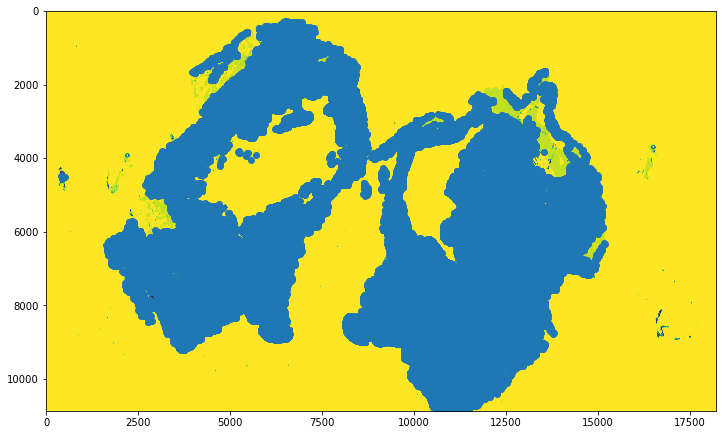

In [65]:
fig2,ax2=plt.subplots(figsize=(12,12))
ax2.imshow(DL_result)
ax2.scatter(x,y)

In [78]:
cell_centroid_5x_true = [_ for _ in cell_centroid_5x if DL_result[_[1],_[0]]==10]

In [80]:
x= pd.DataFrame(cell_centroid_5x_true)[0]
y= pd.DataFrame(cell_centroid_5x_true)[1]

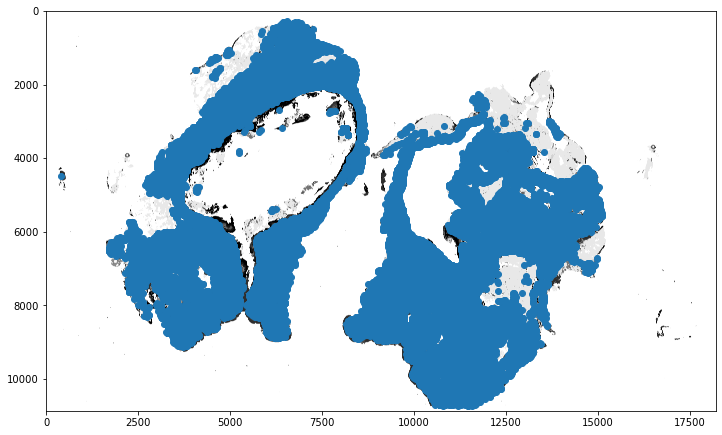

In [83]:
fig3,ax3=plt.subplots(figsize=(12,12))
ax3.imshow(DL_result,cmap='gray')
ax3.scatter(x,y)

In [84]:
cell_centroid_20x=np.around(np.multiply(cell_centroid_5x_true,4)).astype('int')

In [86]:
from openslide import OpenSlide
svs = OpenSlide(r'\\kukissd\Kyu_Sync\Aging\data\svs\5619_Wirtz.Denis_OTS-19_5619-003.svs')
svs = svs.read_region(location=(0,0),level=0,size=svs.dimensions)

In [87]:
dst = r'C:\Users\kyuha\PycharmProjects\Aging\Fibroblast_detection\temp'
for idx,(x,y) in enumerate(cell_centroid_20x):
    (left, upper, right, lower) = (x-40, y-40, x+40, y+40)
    im_crop = svs.crop((left, upper, right, lower))
    im_resized = im_crop.resize((240, 240))
    tile_fn = 'tile_{:d}.png'.format(idx)
    im_resized.save(os.path.join(dst,tile_fn))

KeyboardInterrupt: 